In [179]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [181]:
df_train = pd.read_excel(r'/content/bike_train.xlsx')
df_test = pd.read_excel(r'/content/bike_test.xlsx')

# Exploración

### Datos faltantes y tipo de datos

In [ ]:
# A primera vista, no hay datos faltantes que imputar
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [ ]:
# Considerar si hay que hacer transformaciones
# Pasar enteros a float
# Convertir fecha a ordinal o prescindir de la columna ya que las fechas estan desglosadas y ademas tenemos la columna instant
df_train.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [ ]:
df_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


## Busqueda de correlaciones para ir teniendo un criterio sobre la selección de features.


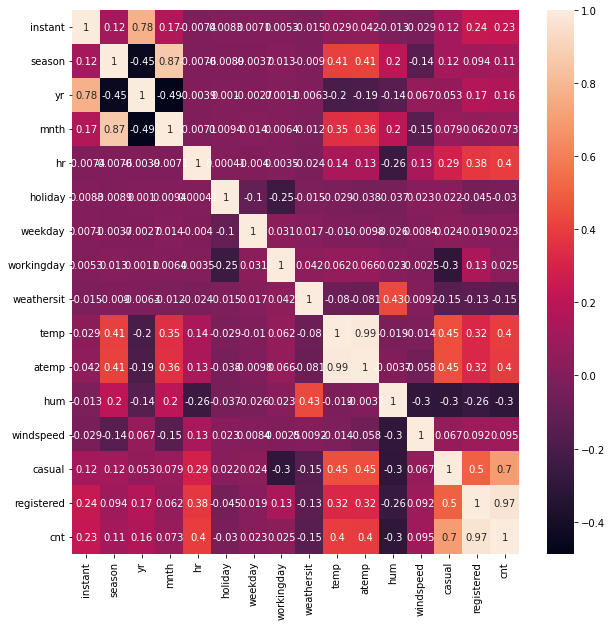

In [ ]:
# A primera vista podríamos considerar eliminar una de las variables de temperatura ya que están casi totalmente relacionadas.
# Podría optarse por utilizar 'atemp' dado que la sensación térmica considera la humedad y así elminar también la columna 'hum' para simplificar el input del modelo.
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
# Exploración visual de correlación de variables
sns.pairplot(df_train)

In [ ]:
df_train.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


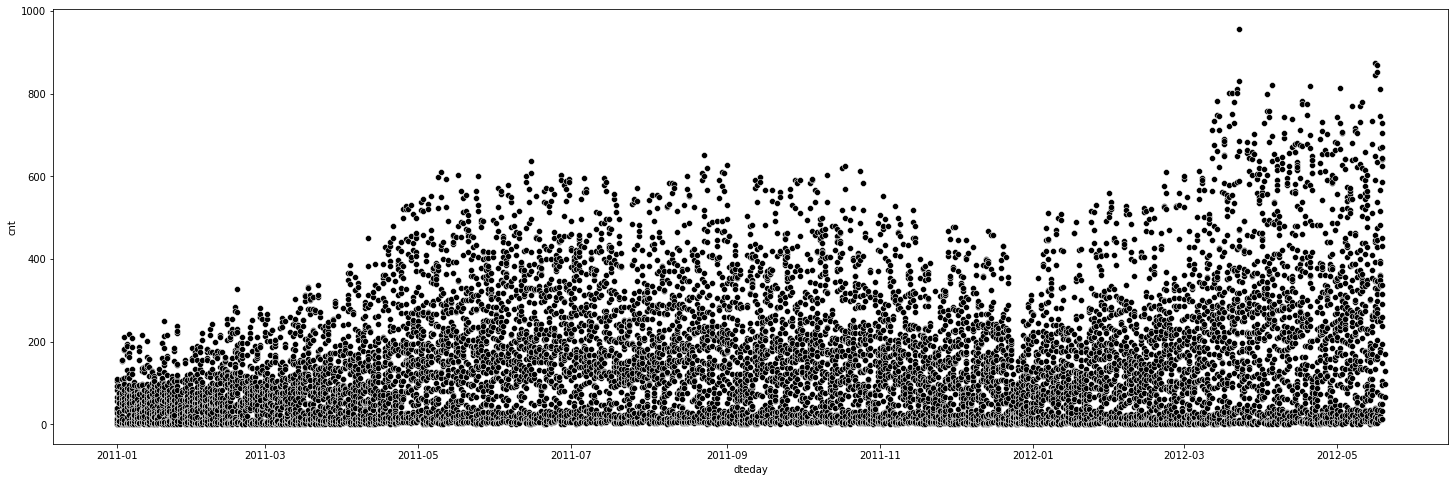

In [ ]:
# Dado que el objetivo es predecir el número de bicicletas rentadas cada día ploteamos las variables pertinentes
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=df_train, x="dteday", y="cnt", color="black",
)

In [182]:
# Tomamos una muestra para ver mas en detalle que es lo que está ocurriendo
sample = df_train[(df_train['instant'] > 11500)]

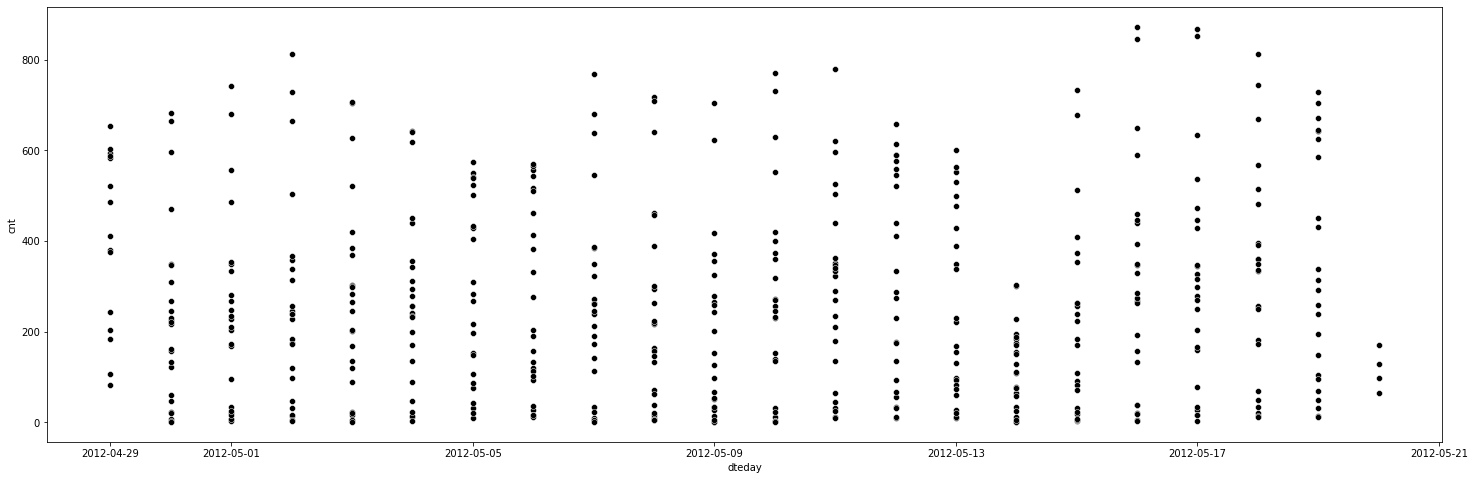

In [183]:
# Tomando los días como x no se logra apreciar un patrón claro
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=sample, x="dteday", y="cnt", color="black",
)

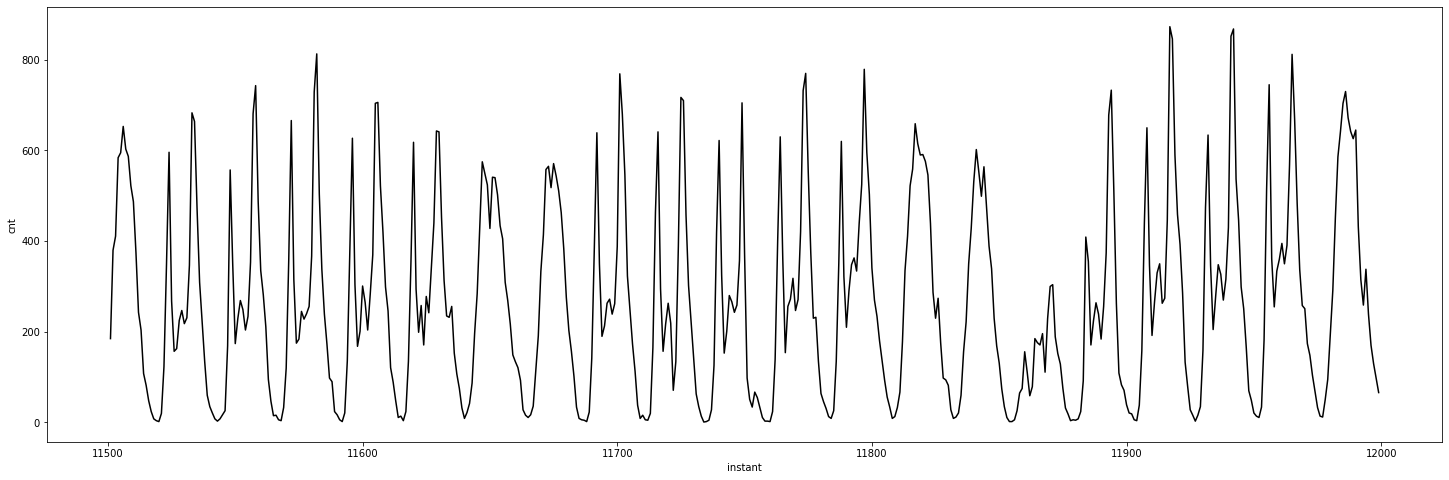

In [184]:
# En este gráfico podemos apreciar la estacionalidad diaria.
# Los días de semana presentan una baja, es decir, a cierta hora de la mañana y a cierta hora de la tarde tenemos picos.
# En cambio los fines de semana no existe ese decaimiento.
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="cnt", color="black",
)

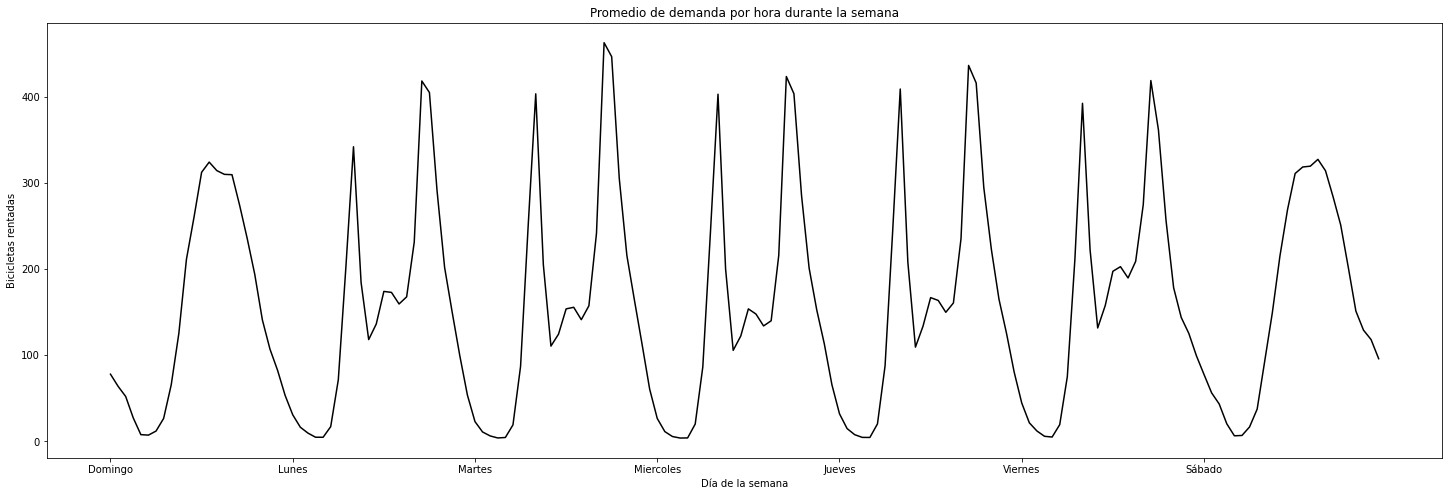

In [284]:
fig, ax = plt.subplots(figsize=(25, 8))
average_week_demand = df_train.groupby(["weekday", "hr"]).mean()["cnt"]
average_week_demand.plot(ax=ax, color='black')
conf = ax.set(
    title="Promedio de demanda por hora durante la semana",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Domingo", "Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sábado"],
    xlabel="Día de la semana",
    ylabel="Bicicletas rentadas",
)

### Conclusiones de la exploración:
Dadas las características del problema, debemos implementar un modelo de regresión. Sin embargo es evidente que el dataset presenta cierta complejidad por lo que no es conveneniente utilizar modelos de regressión lineal. Tampoco nos sirven modelos de regresión logística.

Lo que haremos será utilizar un ensamble de modelos como lo es el Gradient Boosting Regressor, que combina fundamentos de diferntes modelos como random forest(decisión en base a promedios) y adaboosting(optimización), permitiendo que el modelo se ajuste de manera iterativa con datos contiguos optimizando los resultados mediante una función de pérdida que se ajusta por pasos mediante descenso del gradiente.

### Eliminación manual de features

In [185]:
# Preparamos manualmente algunos datos
df_train.drop(columns=['dteday'], inplace=True) #Eliminamos la columna con fechas ya que está desglosada y tenemos 'instant'. Windspeed parece te 
df_test.drop(columns=['dteday'], inplace=True)

target = df_train.pop('cnt')                                                             #Guardamos el target
columns = set(list(df_train.columns.values)).intersection(list(df_test.columns.values))  #Eliminar columnas que no estan en el test dataset.
drop = [x for x in df_train.columns if x not in columns]          
df_train.drop(columns=drop, inplace=True)
df_train = pd.concat([df_train, target], axis=1)      

### Preparamos los datos para entrenar el modelo

In [186]:
X_train = df_train.to_numpy()[:, :-1]
y_train = target.to_numpy()
X_train.shape, y_train.shape

((11999, 13), (11999,))

In [187]:
X_test = df_test.to_numpy()#[:, :-1]
y_test = df_test.to_numpy()[:, 0]
X_test.shape, y_test.shape

((5380, 13), (5380,))

# Machine Learning

# Recursos utilizados:
  1. Selección de features: SelectKBest
  2. En lugar de train split utilizaremos RepeatedKFold.
    1. Esto permite entrenar un solo modelo con diferentes segmentos de los datos utilizados. El parámetro n_splits (equivalente a test_size del módulo train_test_split) nos permite especificar en cuantos segmentos queremos dividir el dataset; el parámetro n_repeats indica cuantos experimentos se van a hacer, cada uno de ellos tenrdá un score diferente.
    2. Info: https://www.youtube.com/watch?v=fKz-SgScM3Q
  3. Grid Search (Validación cruzada) para encontrar los mejores hyperparametros.
  4. Gradient Boost Regressor
    1. Explicación intuitiva y conceptual del funcionamiento: https://www.youtube.com/watch?v=3CC4N4z3GJc&t=84s
    2. Detalles técnicos: https://www.youtube.com/watch?v=2xudPOBz-vs&t=531s
  5. Métricas

In [188]:
from sklearn.ensemble import GradientBoostingRegressor                          #Core model
from sklearn.model_selection import RepeatedKFold                               #https://www.youtube.com/watch?v=fKz-SgScM3Q
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as rmse
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

# Probando distintas funciones de elección de features
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, mutual_info_regression

### Preprosesamiento
#### Dado que no es requerido hacer escalado pasamos a la selección de features

In [191]:
# Utilizamos SelectKBest con una función apta para el trabajo como f_regression (por default f_classif)
preprocessor = Pipeline(steps=
                        [('feature_selection', SelectKBest(score_func=mutual_info_classif, k=8)),
                         ('regressor', GradientBoostingRegressor())
                        ])
preprocessor.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7f676150b710>)),
                ('regressor', GradientBoostingRegressor())])

In [192]:
mask = preprocessor['feature_selection'].get_support() # Valores booleanos para las columnas
mask

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False])

In [193]:
new_features = df_train.columns[:-1][mask]             # Filtramos las columans elegidas
new_features

Index(['instant', 'season', 'mnth', 'hr', 'workingday', 'weathersit', 'temp',
       'atemp'],
      dtype='object')

In [15]:
# Vemos que descartó 'holiday','weekday','hum' y 'yr' ... Creo que se podría eliminar temp o atemp de manera manual
df_train.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Elección de hyperparametros con GridSearch

Explicación de algunos hyperparámetros:
  1. feature_selection_score_func: función que utilizará el algoritmo para elegir las mejores features.
  2. feature_selection_k: número máximo de features a utilizar.
  3. regressor_n_estimators: cantidad de árboles máximos a utlizar
  4. regressor_min_samples_split: cantidad mínima de datos clasificados en cada hoja
  5. regressor_max_depth: profunidad máxima de los árboles
  6. regressor_learning_rate: tamaño de los pasos para el descenso del gradiente

In [309]:
# Estuve probando varias veces esto. Tarda mucho en algunas configuraciones por lo que solo dejé los parametros que dieron mejor resultado
grid = GridSearchCV(estimator = preprocessor,
                    param_grid = {"feature_selection__score_func": [mutual_info_classif],
                                  "feature_selection__k":[8],
                                  "regressor__n_estimators": [2000],       
                                  "regressor__learning_rate": [0.1], # Mientras mas chicos los pasos mas n_estimators necesita para lograr un buen resultado ya que el resultado de la función de pérdida mas pequeño         
                                  "regressor__min_samples_split": [2],          
                                  "regressor__max_depth": [9],
                                  "regressor__verbose":[1]
                                  },
                    n_jobs=-1,
                    scoring = ["r2","neg_root_mean_squared_error"],
                    refit = "r2",
                    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)     #Probar shuffle
                    ) 

In [310]:
# Fiteamos # ~ 4.19 min... for 2000 n_estimators ~12min,22s
grid_result = grid.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       19046.7388            1.02m
         2       15901.8735            1.00m
         3       13336.3007           59.60s
         4       11258.8583           59.90s
         5        9549.0309            1.01m
         6        8174.3885            1.00m
         7        7042.3291            1.02m
         8        6077.6454            1.02m
         9        5292.9693            1.03m
        10        4632.1664            1.03m
        20        1741.6214            1.02m
        30        1007.2110            1.01m
        40         685.3323           59.68s
        50         548.0549           59.58s
        60         487.6074           59.52s
        70         413.1094           59.58s
        80         370.0653           59.25s
        90         332.4738           59.13s
       100         298.9194           58.83s
       200         135.0765           55.82s
       300          73.8045           52.88s
       40

In [311]:
# Vemos el porcentaje de aciertos en predicción
grid_result.best_score_

0.9499916597985368

In [312]:
import pickle
# Guardar modelo
filename = 'finalized_model.sav'
pickle.dump(grid, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [214]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [206]:
#Exportar arboles 
#for i in range(grid.estimator[1].estimators_.shape[0]):
#    dot_data = tree.export_graphviz(grid.estimator[1].estimators_[i][0], out_file=None) 
#    graph = pydotplus.graph_from_dot_data(dot_data) 
#    graph.write_pdf("../content/trees/"+str(i)+".pdf") 


## Podemos visualizar que está haciendo cada arbol de regresión. 

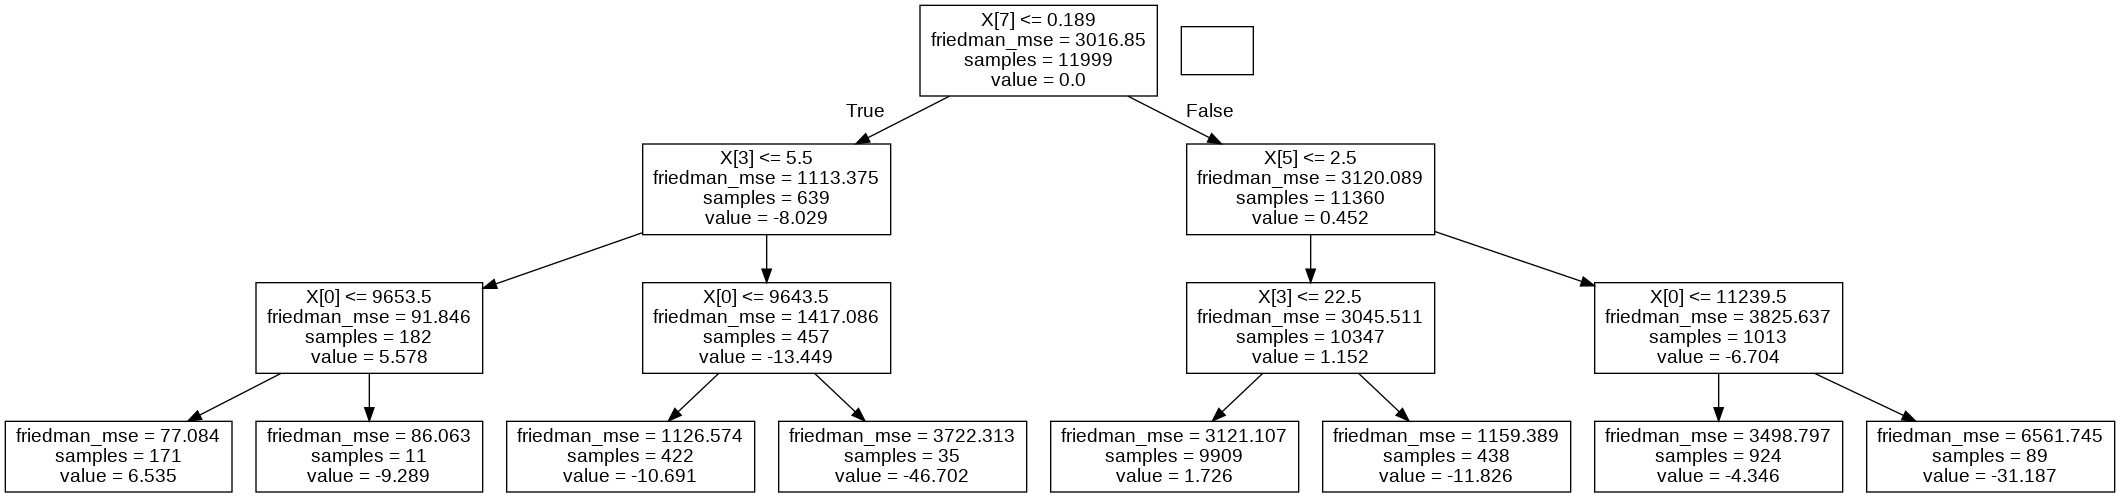

In [220]:
dot_data = tree.export_graphviz(grid.estimator[1].estimators_[99][0], out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 

# El porqué del overfitting
 1. Mientras más arboles se generen mas preciso va ser el modelo, al punto de encajar cada valor particular en un lugar diferente, perdiendo generalización (hasta llegar a 0 Bias).

In [ ]:
# Detalle
grid_result.cv_results_

In [46]:
# Mejores seteo de hyperparametros
grid_result.best_params_

{'feature_selection__k': 8,
 'feature_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 9,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 500}

## Predicción

In [313]:
# Exportamos predicciones
predictions = grid.predict(X_test)
output = pd.DataFrame(predictions, columns=['pred'])
output.to_csv('/content/drive/MyDrive/csvs/kuanthum_rmse_0.69.csv', sep=',', decimal='.', index=False)

In [297]:
predictions

array([ 22.41040463,  22.14137344,  47.43226122, ..., 171.33378745,
       130.4214973 ,  88.52180836])

# Evaluación

In [308]:
# Evaluamos raiz del error cuadratico medio #last 91
rmse(y_train, grid.predict(X_train))

141.68720781363498

In [50]:
predicted = grid.predict(X_train)

In [51]:
df_predicted = df_train

In [52]:
df_predicted['predicted'] = predicted

In [53]:
df_predicted['value'] = y_train

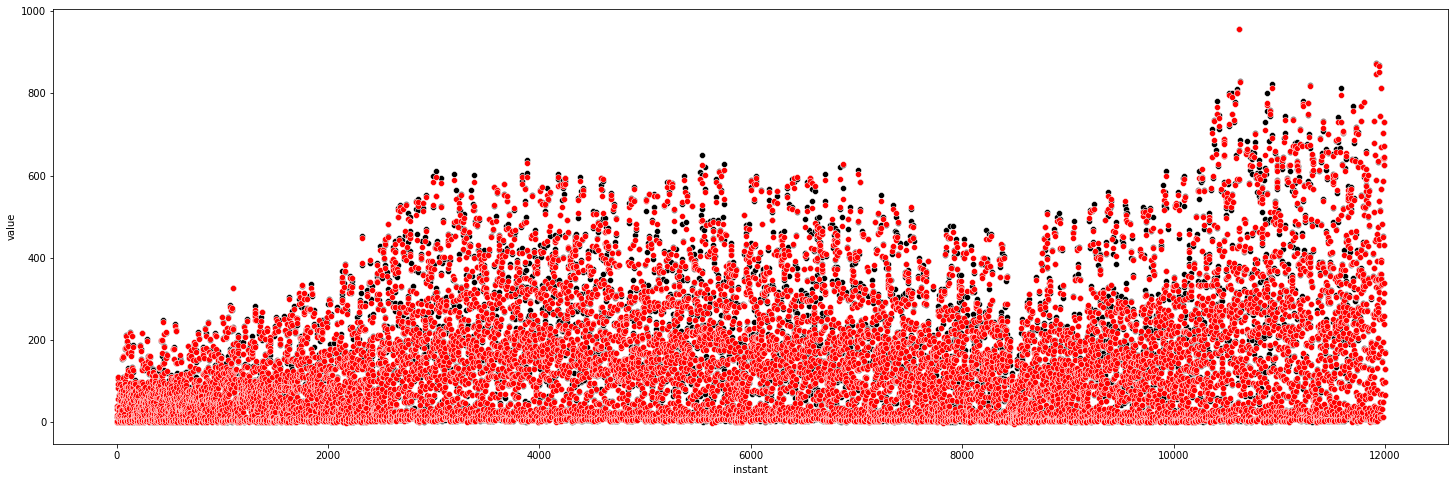

In [54]:
# Comparamos visualmente los datos originales vs la predicción
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=df_train, x="instant", y="value", color="black",
)
ax2 = sns.scatterplot(
    data=df_train, x='instant', y='predicted', color='red'
)

In [225]:
# Tomamos una muestra para ver que está pasando
# Evidentemente se ve un sobreajuste del modelo
sample = df_predicted[(df_predicted['instant'] > 11500)]

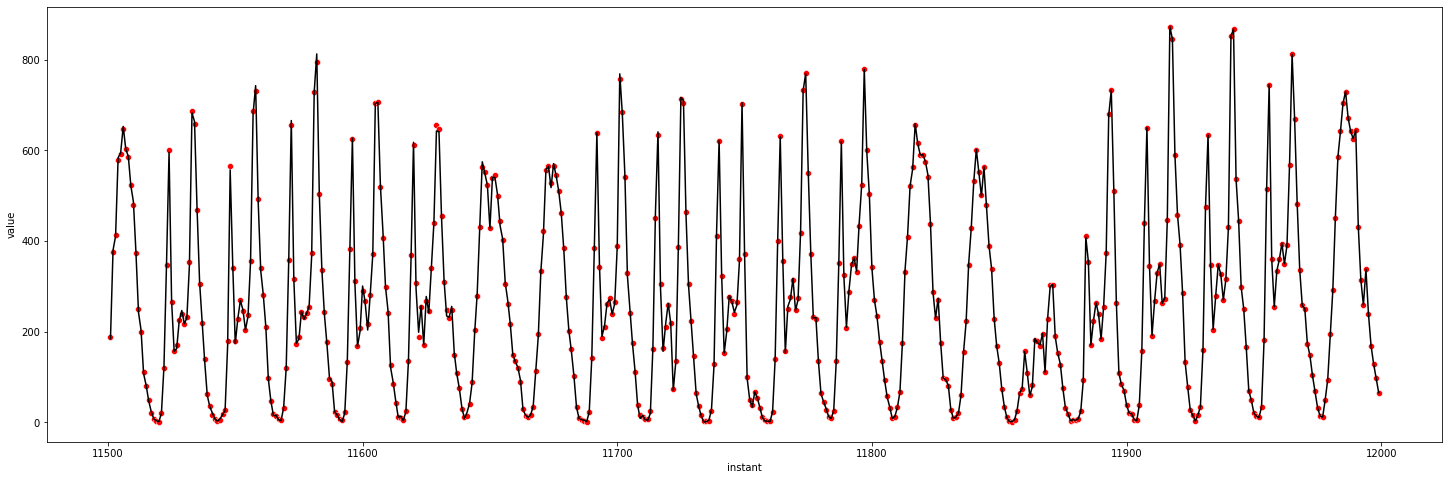

In [226]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.scatterplot(
    data=sample, x='instant', y='predicted', color='red'
)

### Para evitar overfitting, además de corregir ciertos hyperparámetros se podría entrenar el modelo modificando la data original, para lo cual investigaremos la librería scikit-fda, particularmente su módulo Kernel Smoothing
  1. Esta idea se me ocurre ya que queremos mantener la estacionalidad que el modelo predice pero hacerlo mas flexible para futuras predicciones
  2. Documentación sobre la librería utilizada

    https://fda.readthedocs.io/en/latest/modules/preprocessing/smoothing.html

    https://fda.readthedocs.io/en/latest/auto_examples/plot_kernel_smoothing.html#sphx-glr-auto-examples-plot-kernel-smoothing-py

In [61]:
!pip install scikit-fda
!pip install install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_fda-0.7.1-py2.py3-none-any.whl (366 kB)
     |████████████████████████████████| 4.0 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached multimethod-1.9-py3-none-any.whl (10 kB)
  Using cached rdata-0.9-py3-none-any.whl (19 kB)
  Using cached dcor-0.5.3-py2.py3-none-any.whl (35 kB)
  Using cached findiff-0.9.2-py3-none-any.whl (30 kB)
  Created wheel for fdasrsf: filename=fdasrsf-2.3.11-cp37-cp37m-linux_x86_64.whl size=1517391 sha256=ad1853566c654a74419abeb1423fff79c2d3f45a121151d64623c967fc835c7b
  Stored in directory: /root/.cache/pip/wheels/9e/e0/a4/c6544a50743edc9fdddf4a13a7e773e650633773708d8582ba
Successfully built fdasrsf


In [237]:
import math
import skfda.preprocessing.smoothing as ks #Pueden utilizarse 3 estimadores diferentes
from skfda import FDataGrid

In [238]:
#Para hacer el smoothing hay que convertir los datos a la clase FDataGrid
#https://fda.readthedocs.io/en/latest/auto_tutorial/plot_getting_data.html. En el apartado 'The FDataGrid class' se encuentra especificaciones

fd = FDataGrid(
     grid_points=[sample['instant']],
     data_matrix=[target[11500:]],
)

In [ ]:
# El parametro smoothing_paramater puede variarse para especificar que tan 'invasivo' queremos que sea el proceso.
target_smooth = ks.kernel_smoothers.NadarayaWatsonSmoother(smoothing_parameter=3.5).fit_transform(fd)
sample['smoothed'] = target_smooth.data_matrix[0]

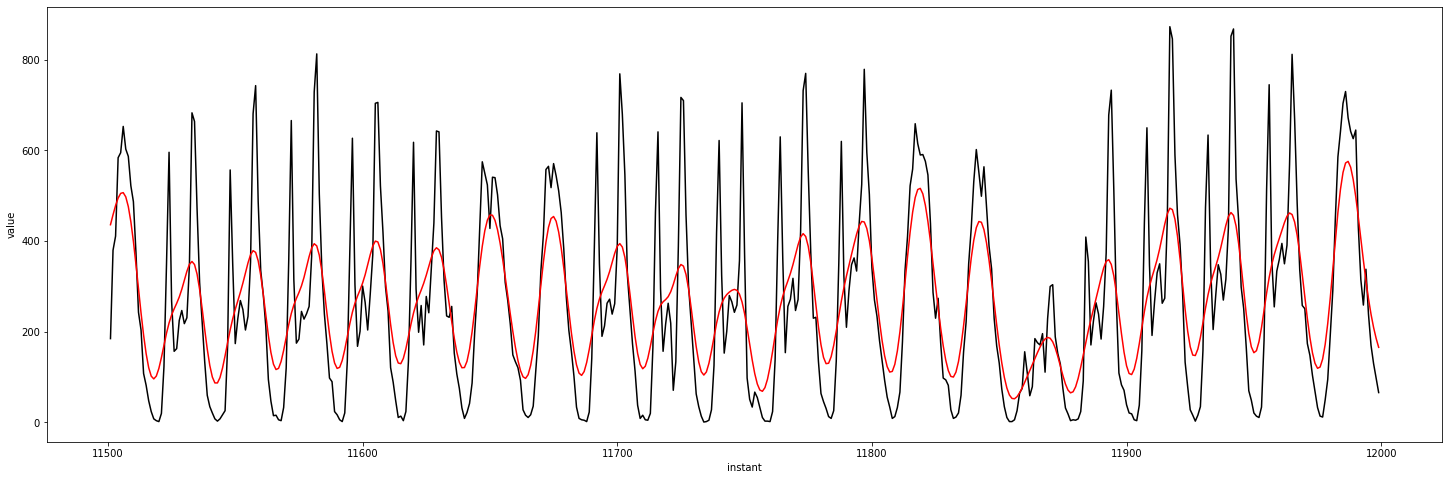

In [240]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.lineplot(
    data=sample, x='instant', y='smoothed', color='red'
)

In [249]:
# Modificamos smoothing_parameter
target_smooth_2 = ks.kernel_smoothers.NadarayaWatsonSmoother(smoothing_parameter=1.5).fit_transform(fd)
sample['smoothed'] = target_smooth_2.data_matrix[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


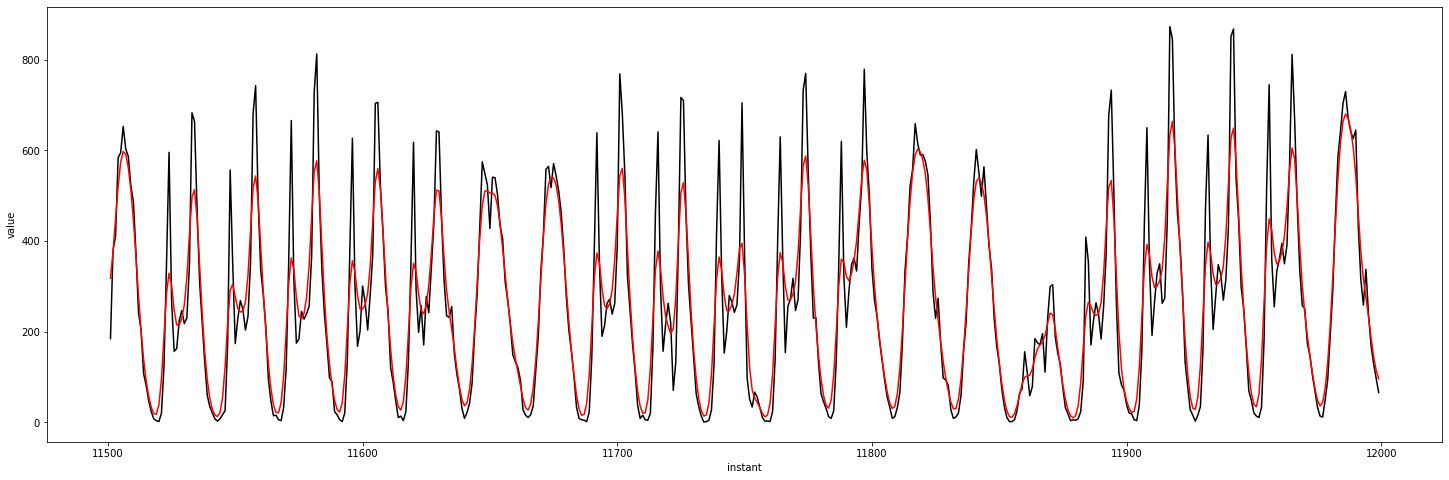

In [250]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.lineplot(
    data=sample, x='instant', y='smoothed', color='red'
)

In [253]:
# Probamos otro estimador
target_smooth_kn = ks.kernel_smoothers.KNeighborsSmoother(smoothing_parameter=1.5).fit_transform(fd)
sample['smoothed'] = target_smooth_kn.data_matrix[0]
ks.kernel_smoothers.KNeighborsSmoother

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


skfda.preprocessing.smoothing.kernel_smoothers.KNeighborsSmoother

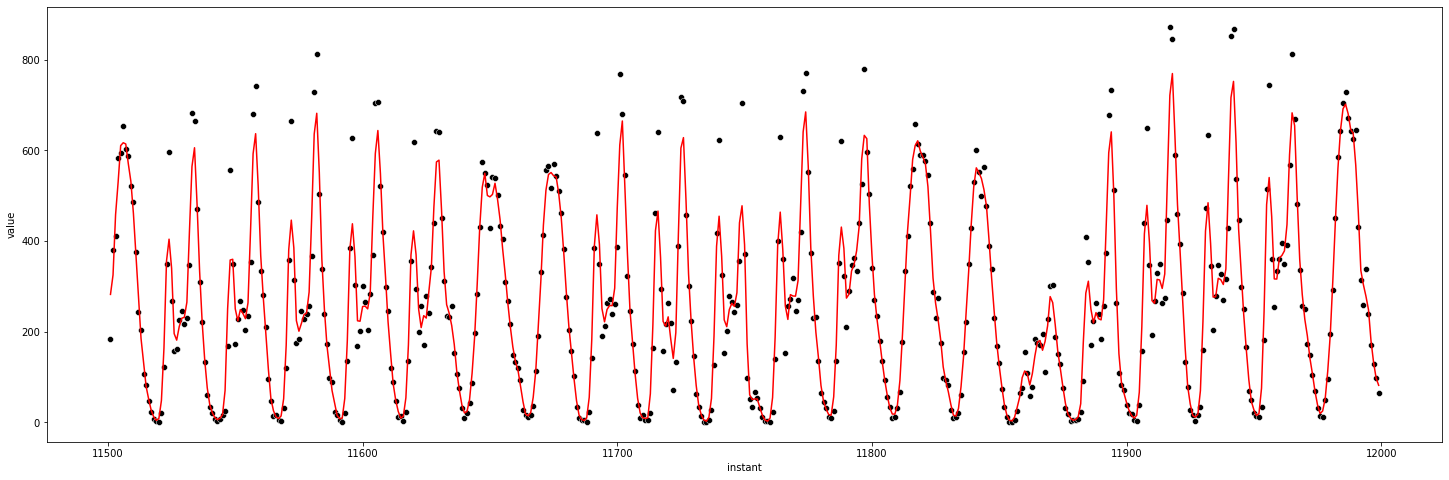

In [254]:
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.lineplot(
    data=sample, x='instant', y='smoothed', color='red'
)